In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [34]:
#Reading data:

df = pd.read_csv("KU-HAR.csv",header=None)
dff = df.values
signals = dff[:, 0: 1800]
signals = np.array(signals, dtype=np.float32)
labels = dff[:, 1800] 

print(signals.shape)
print(labels.shape)

(20750, 1800)
(20750,)


In [35]:

fft = np.zeros(signals.shape, dtype=np.float32)
for i in range(0,len(signals)):
    for j in range(0, 6):
        tmp = np.fft.fft(signals[i, j*300:(j+1)*300])
        fft[i, j*300:(j+1)*300] = abs(tmp)
        
print(fft.shape)

(20750, 1800)


In [36]:

X_train, X_test, y_train, y_test=train_test_split(np.array(fft),labels, test_size=0.3, random_state=9, stratify=labels)
print(X_train.shape)
print(X_test.shape)

(14525, 1800)
(6225, 1800)


In [37]:
y_train.shape

(14525,)

In [7]:

import pandas as pd
import numpy as np # linear algebra
from numpy import mean
from numpy import std
from numpy import dstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM,GRU,SimpleRNN
from keras.utils import to_categorical
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



In [65]:
X_test.shape

(6225, 1800)

In [75]:
BATCH_SIZE=batch_size
def display_history(history_):
    fig, ax = plt.subplots(1,2, figsize=(12, 3))
    ax[0].plot(history_.history['loss'], color='b', label="training_loss")
    ax[0].plot(history_.history['val_loss'], color='r', label="validation_loss",axes =ax[0])
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")
    legend = ax[0].legend(loc='best', shadow=True)
    ax[1].plot(history_.history['accuracy'], color='b', label="training_accuracy")
    ax[1].plot(history_.history['val_accuracy'], color='r',label="validation_accuracy")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy")
    legend = ax[1].legend(loc='best', shadow=True)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

def plot_metrices(model_):
    # Predicting the test data
    
    pred = model_.predict(X_test, batch_size=BATCH_SIZE)
    pred_class_indices = np.argmax(pred, axis=1)  # Convert predictions to class indices
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), pred_class_indices)
    
    # Define classes for plotting
    classes = ["Stand", "Sit","Talk-sit","Talk-stand","Stand-sit","Lay","Lay-stand","Pick","Jump","Push-up","Sit-up","Walk","Walk-backward","Walk-circle","Run","Stair-up","Stair-down","Table-tennis"]


    # Plot the confusion matrix
    plt.figure()
    ax = plt.subplot()
    ax.set_title('Confusion Matrix')
    
    # Use 'd' format to display integers instead of scientific notation
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Reds')
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Print classification report
    print(classification_report(y_test.argmax(axis=1), pred_class_indices, target_names=classes))

    # Calculate total samples
    total = cm.sum()
    
    # Calculate accuracy, sensitivity, and specificity
    accuracy = np.trace(cm) / total  # Total correct predictions divided by total samples
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # True positive rate for the first class
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])  # True negative rate for the second class

    # Print metrics with appropriate formatting
    print(f"ACC: {accuracy:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")


In [42]:

import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

timesteps = 1 
features = X_train.shape[1]  

# Reshape X_train
X_train = X_train.reshape((X_train.shape[0], timesteps, features))


In [66]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

timesteps = 1 # Number of timesteps per sequence (modify as needed)
features = X_test.shape[1]  # Number of features per timestep

# Reshape X_train
X_test = X_test.reshape((X_test.shape[0], timesteps, features))


In [67]:
X_test.shape

(6225, 1, 1800)

In [43]:
X_train.shape

(14525, 1, 1800)

In [ ]:
from tensorflow.keras.utils import to_categorical

num_classes = 18  
y_train_categorical = to_categorical(y_train, num_classes)


In [ ]:
y_test=to_categorical(y_test, num_classes)

In [ ]:
y_test.shape

(6225, 18)

In [ ]:
y_train_categorical.shape
y_train=y_train_categorical

# GRU

In [102]:
# Initialize the model
model = Sequential()

# Add GRU layer with specified units and input shape
model.add(GRU(100, input_shape=(timesteps, features)))

# Add a Dropout layer
model.add(Dropout(0.3))

# Add Dense layers
model.add(Dense(100, activation='relu'))

# Add the output layer
model.add(Dense(18, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [103]:
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.25, batch_size=batch_size, verbose=1)


Epoch 1/30
86/86 [==============================] - 2s 9ms/step - loss: 2.1580 - accuracy: 0.3651 - val_loss: 1.0030 - val_accuracy: 0.7189
Epoch 2/30
86/86 [==============================] - 0s 5ms/step - loss: 0.9915 - accuracy: 0.7015 - val_loss: 0.6567 - val_accuracy: 0.8172
Epoch 3/30
86/86 [==============================] - 0s 5ms/step - loss: 0.7703 - accuracy: 0.7620 - val_loss: 0.5716 - val_accuracy: 0.8216
Epoch 4/30
86/86 [==============================] - 0s 5ms/step - loss: 0.7130 - accuracy: 0.7769 - val_loss: 0.5032 - val_accuracy: 0.8381
Epoch 5/30
86/86 [==============================] - 0s 5ms/step - loss: 0.6211 - accuracy: 0.8039 - val_loss: 0.4384 - val_accuracy: 0.8615
Epoch 6/30
86/86 [==============================] - 0s 4ms/step - loss: 0.6046 - accuracy: 0.8068 - val_loss: 0.4467 - val_accuracy: 0.8689
Epoch 7/30
86/86 [==============================] - 0s 5ms/step - loss: 0.6221 - accuracy: 0.8017 - val_loss: 0.4540 - val_accuracy: 0.8618
Epoch 8/30
86/86 [==

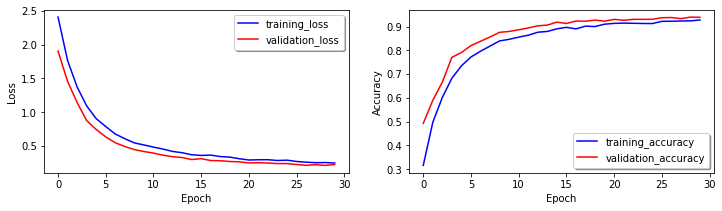

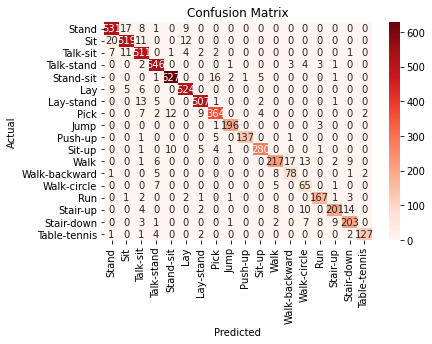

               precision    recall  f1-score   support

        Stand       0.93      0.94      0.94       566
          Sit       0.94      0.92      0.93       562
     Talk-sit       0.89      0.95      0.92       539
   Talk-stand       0.94      0.97      0.96       560
    Stand-sit       0.96      0.96      0.96       653
          Lay       0.95      0.96      0.96       544
    Lay-stand       0.96      0.96      0.96       529
         Pick       0.93      0.91      0.92       400
         Jump       0.97      0.98      0.98       200
      Push-up       0.99      0.95      0.97       144
       Sit-up       0.96      0.93      0.94       302
         Walk       0.90      0.82      0.86       265
Walk-backward       0.79      0.82      0.80        95
  Walk-circle       0.66      0.83      0.73        78
          Run       0.92      0.94      0.93       178
     Stair-up       0.93      0.84      0.88       239
   Stair-down       0.87      0.87      0.87       234
 Table-te

In [76]:
display_history(history)
plot_metrices(model)

112050


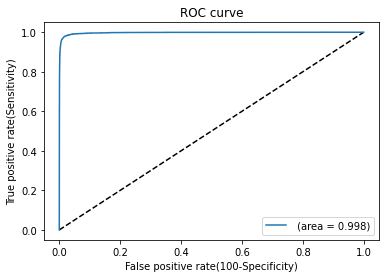

In [81]:
import sklearn.metrics
def plot_roc(model_, name):
    plt.figure()
    ax = plt.subplot()
    ax.set_title('ROC Curve')
    pred = model_.predict(X_test).ravel()
    print(pred.size)
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test.ravel(), pred)
    ac = sklearn.metrics.auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='{} (area = {:.3f})'.format(name, ac))
    plt.xlabel('False positive rate(100-Specificity)')
    plt.ylabel('True positive rate(Sensitivity)')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show
plot_roc(model,"")

# WISNET

In [83]:
!pip install tensorflow-addons


In [88]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(14525, 1, 1800) (6225, 1, 1800) (14525, 18) (6225, 18)


In [112]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import L2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import L2

# Define parameters
input_shape = (1, 1800)  # Adjust as needed
num_classes = 18  # Number of classes
epochs = 30
batch_size = 1024




# Convolved Normalized Pooled (CNPM) Block
def cnpm_block(inputs, filters, kernel_size=5, pool_size=2):
    x = Conv1D(filters, kernel_size, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    # x = MaxPooling1D(pool_size)(x)
    return x

# Identity Block
def identity_block(inputs, filters, kernel_size):
    x = Conv1D(filters, kernel_size, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

# Basic Block
def basic_block(inputs, filters, kernel_size):
    x = Conv1D(filters, kernel_size, padding='same')(inputs)
    x = BatchNormalization()(x)
    # x = ReLU()(x)
    return x

# Identity and Basic (IDBN) Block
def identity_basic_block(inputs, filters, kernel_sizes=[3, 5, 7]):
    idb_outputs = []

    for kernel_size in kernel_sizes:
        id_output = identity_block(inputs, filters, kernel_size)
        id_output = identity_block(id_output, filters, kernel_size)
        basic_output = basic_block(id_output, filters, kernel_size)
        combined_output = Add()([inputs, basic_output])
        combined_output = ReLU()(combined_output)
        idb_outputs.append(combined_output)

    if len(idb_outputs) > 1:
        idb_combined = Add()(idb_outputs)
    else:
        idb_combined = idb_outputs[0]
    
    return idb_combined

# Channel Attention Block
def channel_attention(inputs, reduction_ratio=16):
    channel = inputs.shape[-1]
    
    # Global Average Pooling
    channel_avg_pool = GlobalAveragePooling1D()(inputs)
    channel_max_pool = GlobalMaxPooling1D()(inputs)

    shared_dense_1 = Dense(channel // reduction_ratio, activation='relu')
    shared_dense_2 = Dense(channel, activation='sigmoid')

    avg_out = shared_dense_2(shared_dense_1(channel_avg_pool))
    max_out = shared_dense_2(shared_dense_1(channel_max_pool))

    # Combine the outputs of average and max pooling
    combined_out = Add()([avg_out, max_out])
    combined_out = tf.expand_dims(combined_out, axis=1)

    # Apply the attention weights to the input features
    channel_attention_output = Multiply()([inputs, combined_out])
    return channel_attention_output

# Spatial Attention Block
def spatial_attention(inputs):
    avg_pool = tf.reduce_mean(inputs, axis=-1, keepdims=True)
    max_pool = tf.reduce_max(inputs, axis=-1, keepdims=True)

    concat = tf.concat([avg_pool, max_pool], axis=-1)
    spatial_attention = Conv1D(1, 7, padding='same', activation='sigmoid')(concat)

    # Apply the attention weights to the input features
    spatial_attention_output = Multiply()([inputs, spatial_attention])
    return spatial_attention_output

# Channel and Spatial Attention (CASb) Block
def channel_spatial_attention_block(inputs, reduction_ratio=16):
    x = channel_attention(inputs, reduction_ratio)
    x = spatial_attention(x)
    return x

# WISNet Block
def wisnet_block(inputs, filters, kernel_sizes=[3, 5, 7], reduction_ratio=16):
    x = identity_basic_block(inputs, filters, kernel_sizes)
    x = channel_spatial_attention_block(x, reduction_ratio)
    return x

# Building the WISNet Model
def build_wisnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # CNPM Block
    y = cnpm_block(inputs, 64, kernel_size=5)

    # IDBN1 Block
    x = identity_basic_block(y, 64, kernel_sizes=[3, 5, 7])

    # CASb Block
    x = channel_spatial_attention_block(x, reduction_ratio=16)
    x = Add()([x, y])

    # IDBN2 Block
    x = identity_basic_block(x, 64, kernel_sizes=[3, 5, 7])

    # CASb Block
#     x = channel_spatial_attention_block(x, reduction_ratio=16)

    # Global Pooling and Output Layer
    x = GlobalAveragePooling1D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, x)
    return model

# Define model parameters
# input_shape = (X_train.shape[1],X_train.shape[2]) # Assuming 1D signal with length 50 and 64 channels
num_classes = 18        # Adjust based on the classification task

# Build and summarize the model
model = build_wisnet(input_shape, num_classes)




# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=0
)




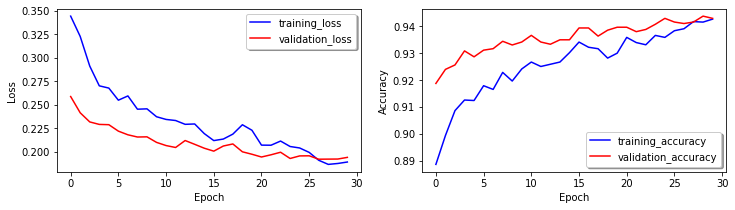

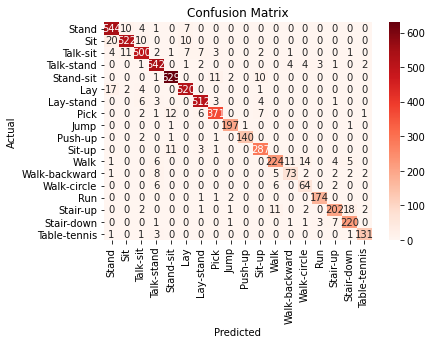

               precision    recall  f1-score   support

        Stand       0.93      0.96      0.94       566
          Sit       0.96      0.93      0.94       562
     Talk-sit       0.94      0.93      0.93       539
   Talk-stand       0.94      0.97      0.96       560
    Stand-sit       0.96      0.96      0.96       653
          Lay       0.95      0.96      0.96       544
    Lay-stand       0.96      0.97      0.97       529
         Pick       0.95      0.93      0.94       400
         Jump       0.97      0.98      0.98       200
      Push-up       0.99      0.97      0.98       144
       Sit-up       0.92      0.95      0.94       302
         Walk       0.91      0.85      0.88       265
Walk-backward       0.81      0.77      0.79        95
  Walk-circle       0.74      0.82      0.78        78
          Run       0.97      0.98      0.97       178
     Stair-up       0.92      0.85      0.88       239
   Stair-down       0.89      0.94      0.91       234
 Table-te

In [111]:
display_history(history)
plot_metrices(model)